In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Load in Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projectoo/cybersecurity_attacks.csv')
df.head(2)

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

# DataCleaning

In [ ]:
df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [ ]:
df.drop(['Timestamp', 'Payload Data', 'Source Port', 'Destination Port', 'IDS/IPS Alerts', 'Source IP Address','Destination IP Address','User Information', 'Device Information','Geo-location Data', 'Firewall Logs', 'Proxy Information','Log Source'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [ ]:
df['Malware Indicators'].fillna('None Detected', inplace=True)
df['Alerts/Warnings'].fillna('No Alert', inplace=True)

In [ ]:
df.head()

,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,Network Segment
0,ICMP,503,Data,HTTP,IoC Detected,28.67,No Alert,Malware,Known Pattern B,Logged,Low,Segment A
1,ICMP,1174,Data,HTTP,IoC Detected,51.50,No Alert,Malware,Known Pattern A,Blocked,Low,Segment B
2,UDP,306,Control,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Segment C
3,UDP,385,Data,HTTP,None Detected,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Segment B
4,TCP,1462,Data,DNS,None Detected,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Segment C


# EDA

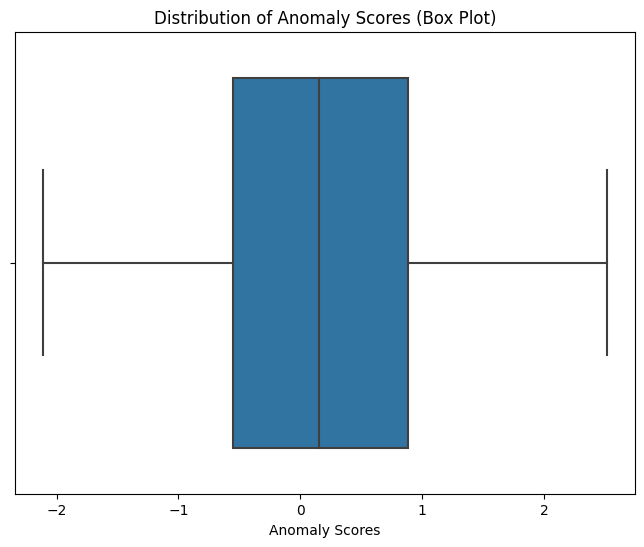

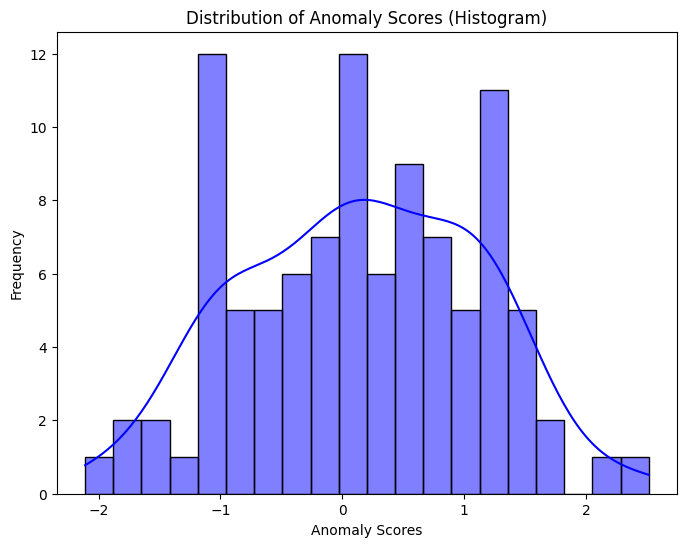

In [ ]:
anomaly_scores = np.random.normal(size=100)

plt.figure(figsize=(8, 6))
sns.boxplot(x=anomaly_scores)
plt.title('Distribution of Anomaly Scores (Box Plot)')
plt.xlabel('Anomaly Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(anomaly_scores, kde=True, bins=20, color='blue')
plt.title('Distribution of Anomaly Scores (Histogram)')
plt.xlabel('Anomaly Scores')
plt.ylabel('Frequency')
plt.show()

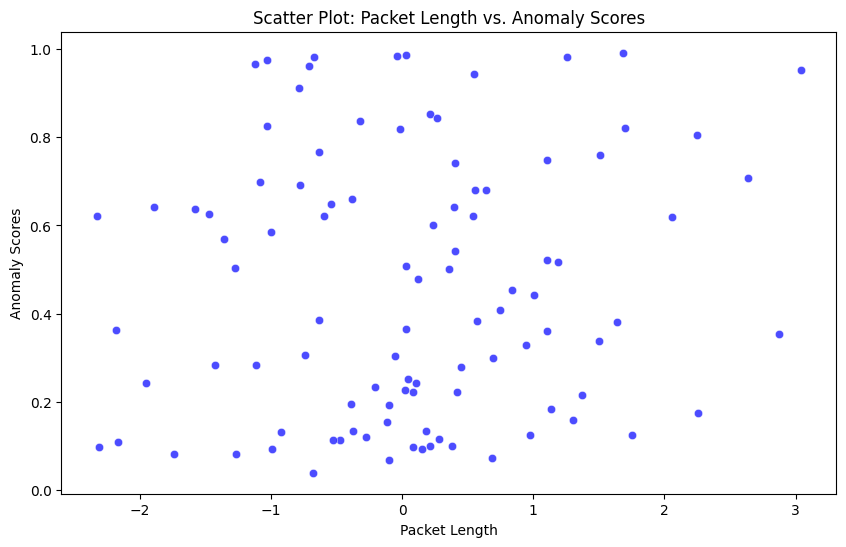

In [ ]:
packet_length = np.random.normal(size=100)
anomaly_scores = np.random.uniform(low=0, high=1, size=100)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=packet_length, y=anomaly_scores, color='blue', alpha=0.7)
plt.title('Scatter Plot: Packet Length vs. Anomaly Scores')
plt.xlabel('Packet Length')
plt.ylabel('Anomaly Scores')
plt.show()

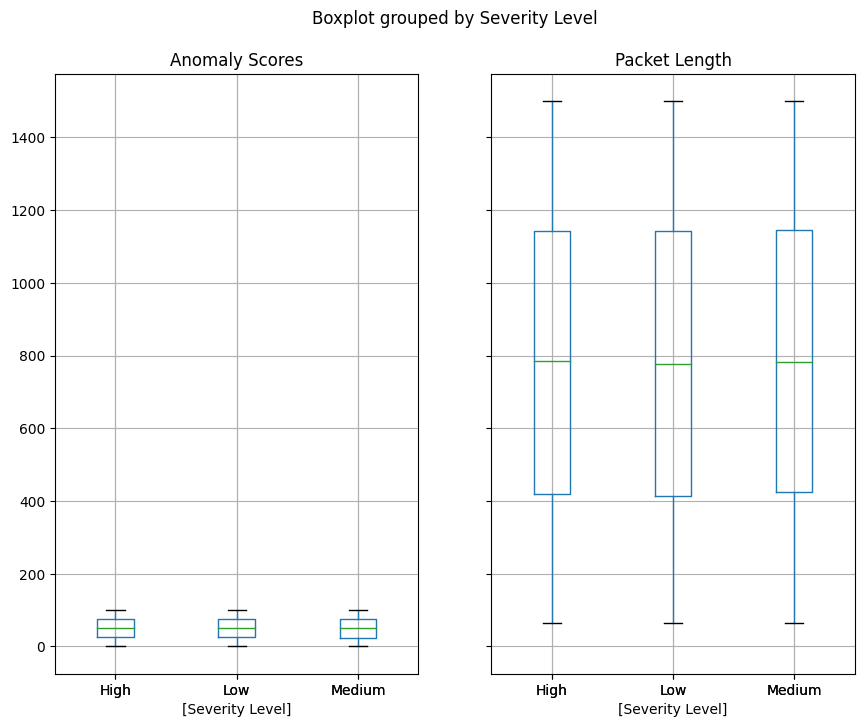

In [ ]:
df.boxplot(figsize=(10,8), by='Severity Level')
plt.show()

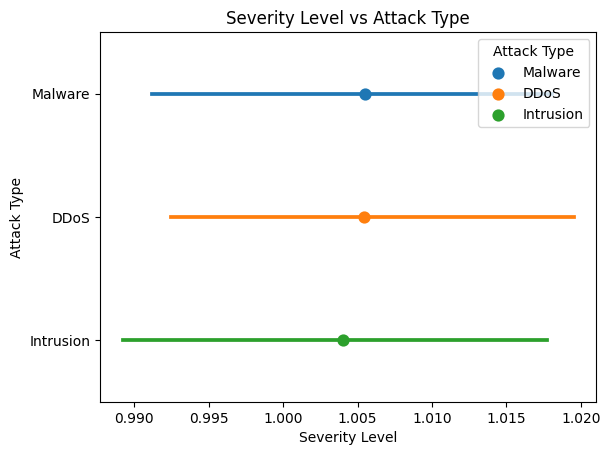

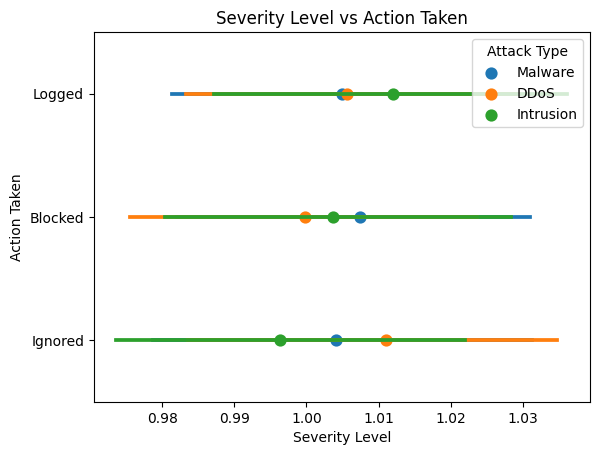

In [ ]:
df['Severity Level'] = pd.factorize(df['Severity Level'])[0]

# Point plot for Attack Type
sns.pointplot(data=df, x="Severity Level", y="Attack Type", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Attack Type")
plt.xlabel("Severity Level")
plt.ylabel("Attack Type")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# Point plot for Action Taken
sns.pointplot(data=df, x="Severity Level", y="Action Taken", hue="Attack Type", markers="o", linestyles="")
plt.title("Severity Level vs Action Taken")
plt.xlabel("Severity Level")
plt.ylabel("Action Taken")
plt.legend(title="Attack Type", loc="upper right")
plt.show()

# PipeLines

In [ ]:
df.columns

Index(['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level',
       'Network Segment'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
df['Anomaly Scores'].unique
plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [ ]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X_train = df [categorical_features + numerical_features]
y_train = df['Anomaly Scores']
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
])



In [ ]:
X_transformed = pipeline.fit_transform(df)

In [ ]:
A = pipeline.fit_transform(X_train, y_train)

In [ ]:
A.shape

(40000, 27)

In [ ]:
A

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.66929478],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.94353482],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -1.14280809],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.62866049],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.        , -0.7173672 ],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.94593844]])

# ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor


In [ ]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings','Severity Level']

numerical_features = ['Packet Length']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X= df [categorical_features + numerical_features]
y= df['Anomaly Scores']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model', RandomForestRegressor(n_estimators=100))
])

In [ ]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length'])])),
                ('model', RandomForestRegressor())])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings',
                                                   'Severity Level']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length'])])),
                ('model', RandomForestRegressor())])

In [ ]:
pipeline['model'].feature_importances_

array([0.0247442 , 0.0239339 , 0.02428885, 0.0202936 , 0.02027507,
       0.02002852, 0.01532386, 0.020771  , 0.02203835, 0.02179287,
       0.02538222, 0.02464892, 0.025544  , 0.02145835, 0.02162054,
       0.02394028, 0.02421038, 0.02433536, 0.02385492, 0.02304868,
       0.02412525, 0.02078316, 0.02099036, 0.02371211, 0.02413364,
       0.02408022, 0.41064138])

In [ ]:
pipeline.feature_names_in_

array(['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
       'Attack Type', 'Attack Signature', 'Action Taken',
       'Network Segment', 'Alerts/Warnings', 'Severity Level',
       'Packet Length'], dtype=object)

In [ ]:
from sklearn.model_selection import cross_validate

cross_validate(pipeline, X_train, y_train, cv=5, scoring='r2', return_train_score=True)

{'fit_time': array([20.18515897, 18.81455874, 17.51359606, 20.35569191, 18.76462865]),
 'score_time': array([0.28775382, 0.33206177, 0.28030729, 0.29209113, 0.35010386]),
 'test_score': array([-0.06711517, -0.06321778, -0.07589004, -0.0586727 , -0.05550825]),
 'train_score': array([0.85081697, 0.85008324, 0.85088673, 0.850613  , 0.85009218])}

In [ ]:
categorical_features = ['Protocol', 'Packet Type', 'Traffic Type', 'Malware Indicators',
                         'Attack Type', 'Attack Signature', 'Action Taken', 'Network Segment', 'Alerts/Warnings']

numerical_features = ['Packet Length', 'Anomaly Scores']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

X= df [categorical_features + numerical_features]
y= df['Severity Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor) , ('model', RandomForestClassifier(n_estimators=100))
])

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Protocol', 'Packet Type',
                                                   'Traffic Type',
                                                   'Malware Indicators',
                                                   'Attack Type',
                                                   'Attack Signature',
                                                   'Action Taken',
                                                   'Network Segment',
                                                   'Alerts/Warnings']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Packet Length',
                                                   'Anomaly Scores'])])),
                ('model', RandomForestClassifier())])

In [ ]:
importances=pipeline['model'].feature_importances_
importances

array([0.01245344, 0.01419155, 0.01263393, 0.01497936, 0.01484077,
       0.01632711, 0.01668012, 0.01687076, 0.01317219, 0.01305252,
       0.01708034, 0.01744994, 0.01801221, 0.016015  , 0.0164226 ,
       0.01583848, 0.01518495, 0.01540503, 0.01599666, 0.0159683 ,
       0.01579929, 0.01643422, 0.01657262, 0.32064833, 0.32197026])

In [ ]:

ft_names = pipeline['preprocessor'].get_feature_names_out()
ft_names

array(['cat__Protocol_ICMP', 'cat__Protocol_TCP', 'cat__Protocol_UDP',
       'cat__Packet Type_Control', 'cat__Packet Type_Data',
       'cat__Traffic Type_DNS', 'cat__Traffic Type_FTP',
       'cat__Traffic Type_HTTP', 'cat__Malware Indicators_IoC Detected',
       'cat__Malware Indicators_None Detected', 'cat__Attack Type_DDoS',
       'cat__Attack Type_Intrusion', 'cat__Attack Type_Malware',
       'cat__Attack Signature_Known Pattern A',
       'cat__Attack Signature_Known Pattern B',
       'cat__Action Taken_Blocked', 'cat__Action Taken_Ignored',
       'cat__Action Taken_Logged', 'cat__Network Segment_Segment A',
       'cat__Network Segment_Segment B', 'cat__Network Segment_Segment C',
       'cat__Alerts/Warnings_Alert Triggered',
       'cat__Alerts/Warnings_No Alert', 'num__Packet Length',
       'num__Anomaly Scores'], dtype=object)

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
cross_validate(pipeline, X_train, y_train, cv=cv, scoring='accuracy', return_train_score=True)

{'fit_time': array([6.33450961, 5.51664329, 6.48245883, 4.51657963, 5.26794815]),
 'score_time': array([0.27574253, 0.28574181, 0.33644724, 0.28030205, 0.35260201]),
 'test_score': array([0.33458333, 0.34055556, 0.34388889, 0.33111111, 0.33083333]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
from sklearn.metrics import make_scorer, f1_score, accuracy_score, precision_score, recall_score, roc_auc_score

In [ ]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_micro': make_scorer(f1_score, average='micro'),
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
}

In [ ]:
results = cross_validate(pipeline, X_train, y_train, cv=cv, scoring=scoring, return_train_score=True)

In [ ]:
results

{'fit_time': array([4.57523894, 5.35600734, 4.89994574, 4.56237817, 5.84199953]),
 'score_time': array([0.29201818, 0.35669923, 0.31449461, 0.33755589, 0.28436947]),
 'test_accuracy': array([0.34027778, 0.33680556, 0.34236111, 0.33263889, 0.33541667]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_f1_micro': array([0.34027778, 0.33680556, 0.34236111, 0.33263889, 0.33541667]),
 'train_f1_micro': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.34017255, 0.33676165, 0.34235328, 0.33265031, 0.33538452]),
 'train_f1_macro': array([1., 1., 1., 1., 1.]),
 'test_precision_macro': array([0.3402251 , 0.33677368, 0.34235747, 0.33266209, 0.33540789]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.34028847, 0.33677555, 0.34236176, 0.33264137, 0.33543581]),
 'train_recall_macro': array([1., 1., 1., 1., 1.])}

In [ ]:
results['test_f1_macro'].mean()

0.3374644624140214

In [ ]:
results['test_f1_micro'].mean()

0.3375

In [ ]:
results['test_accuracy'].mean()

0.3375

In [ ]:
test_pred = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
test_res = pd.DataFrame(classification_report(y_test, test_pred, output_dict=True))
test_res

,0,1,2,accuracy,macro avg,weighted avg
precision,0.324387,0.327774,0.339408,0.3305,0.330523,0.330549
recall,0.320941,0.336310,0.334081,0.3305,0.330444,0.330500
f1-score,0.322654,0.331987,0.336723,0.3305,0.330455,0.330496
support,1318.000000,1344.000000,1338.000000,0.3305,4000.000000,4000.000000


In [ ]:

test_res.to_csv('test_res.csv')


In [ ]:
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

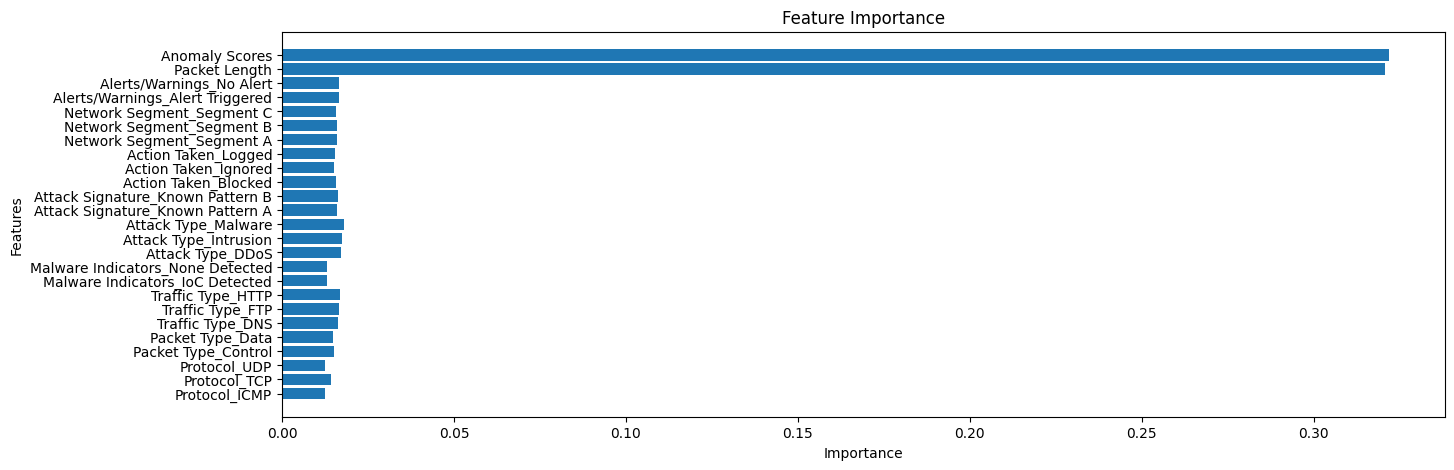

In [ ]:
# cleaned_ft_names = [name.replace("num_", "").replace("cat_", "") for name in ft_names]
cleaned_ft_names = [name.replace("cat__", "").replace("num__", "") for name in ft_names]
plt.figure(figsize=(15, 5))
plt.barh(cleaned_ft_names, importances)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

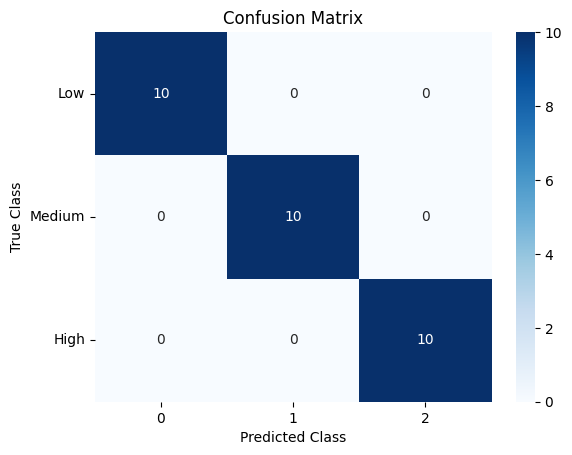

In [ ]:
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

# Customize the y-axis labels and center them
class_labels = ['Low', 'Medium', 'High']
plt.yticks(ticks=np.arange(len(class_labels)) + 0.5, labels=class_labels, rotation=0, va='center')

# Label the axes
plt.xlabel('Predicted Class')
plt.ylabel('True Class')

# Add a title
plt.title('Confusion Matrix')

# Show the plot
plt.show()